#Import Library & Data Frame


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('https://raw.githubusercontent.com/AZHayat/usvisaoverstay/refs/heads/main/usvisaoverstays.csv')
df.head()

,COUNTRY,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,219,291,170,169,164,191,31,93
1,Albania,183,349,384,562,628,776,202,"1,017"
2,Algeria,240,356,374,278,326,420,16,227
3,Andorra,3,9,5,3,10,5,-,8
4,Angola,268,286,684,963,863,625,34,638


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  195 non-null    object
 1   2015     195 non-null    object
 2   2016     195 non-null    object
 3   2017     195 non-null    object
 4   2018     195 non-null    object
 5   2019     194 non-null    object
 6   2020     195 non-null    object
 7   2021     195 non-null    object
 8   2022     195 non-null    object
dtypes: object(9)
memory usage: 13.8+ KB


#Exploratory Data

In [114]:
#Fix data
df[['2015','2016','2017','2018','2019','2020','2021','2022']] = df[['2015','2016','2017','2018','2019','2020','2021','2022']].replace({r',': '', r'^-$': '0', r'^\s*$': '0'}, regex=True)

#fill NaN data with 0
df[['2015','2016','2017','2018','2019','2020','2021','2022']] = df[['2015','2016','2017','2018','2019','2020','2021','2022']].fillna(0)

#change dtype of year column
df[['2015','2016','2017','2018','2019','2020','2021','2022']] = df[['2015','2016','2017','2018','2019','2020','2021','2022']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  195 non-null    object
 1   2015     195 non-null    int64 
 2   2016     195 non-null    int64 
 3   2017     195 non-null    int64 
 4   2018     195 non-null    int64 
 5   2019     195 non-null    int64 
 6   2020     195 non-null    int64 
 7   2021     195 non-null    int64 
 8   2022     195 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 13.8+ KB


#Goals
* yearly overstay trends
* the highest vs the lowest overstay rates by country
* pandemic overstay changes
* predict of future overstay

## yearly overstay trends

In [115]:
#Transpose data to make visualization
df_transpose = df.set_index('COUNTRY', inplace=True)
df_transpose = df.T
df_transpose.head()

COUNTRY,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
2015,219,183,240,3,268,204,7498,195,3964,2694,...,393,16446,1880,502,2,12242,2285,219,73,140
2016,291,349,356,9,286,205,6752,282,6583,2784,...,452,20670,1353,803,1,22906,2689,194,120,148
2017,170,384,374,5,684,205,6574,503,4581,820,...,363,23231,1159,523,1,29419,2326,346,149,176
2018,169,562,278,3,963,202,7909,482,3155,647,...,383,12233,1397,667,0,34902,1750,507,219,192
2019,164,628,326,10,863,211,6189,638,4240,733,...,275,14463,1084,502,2,37914,1555,117,194,284


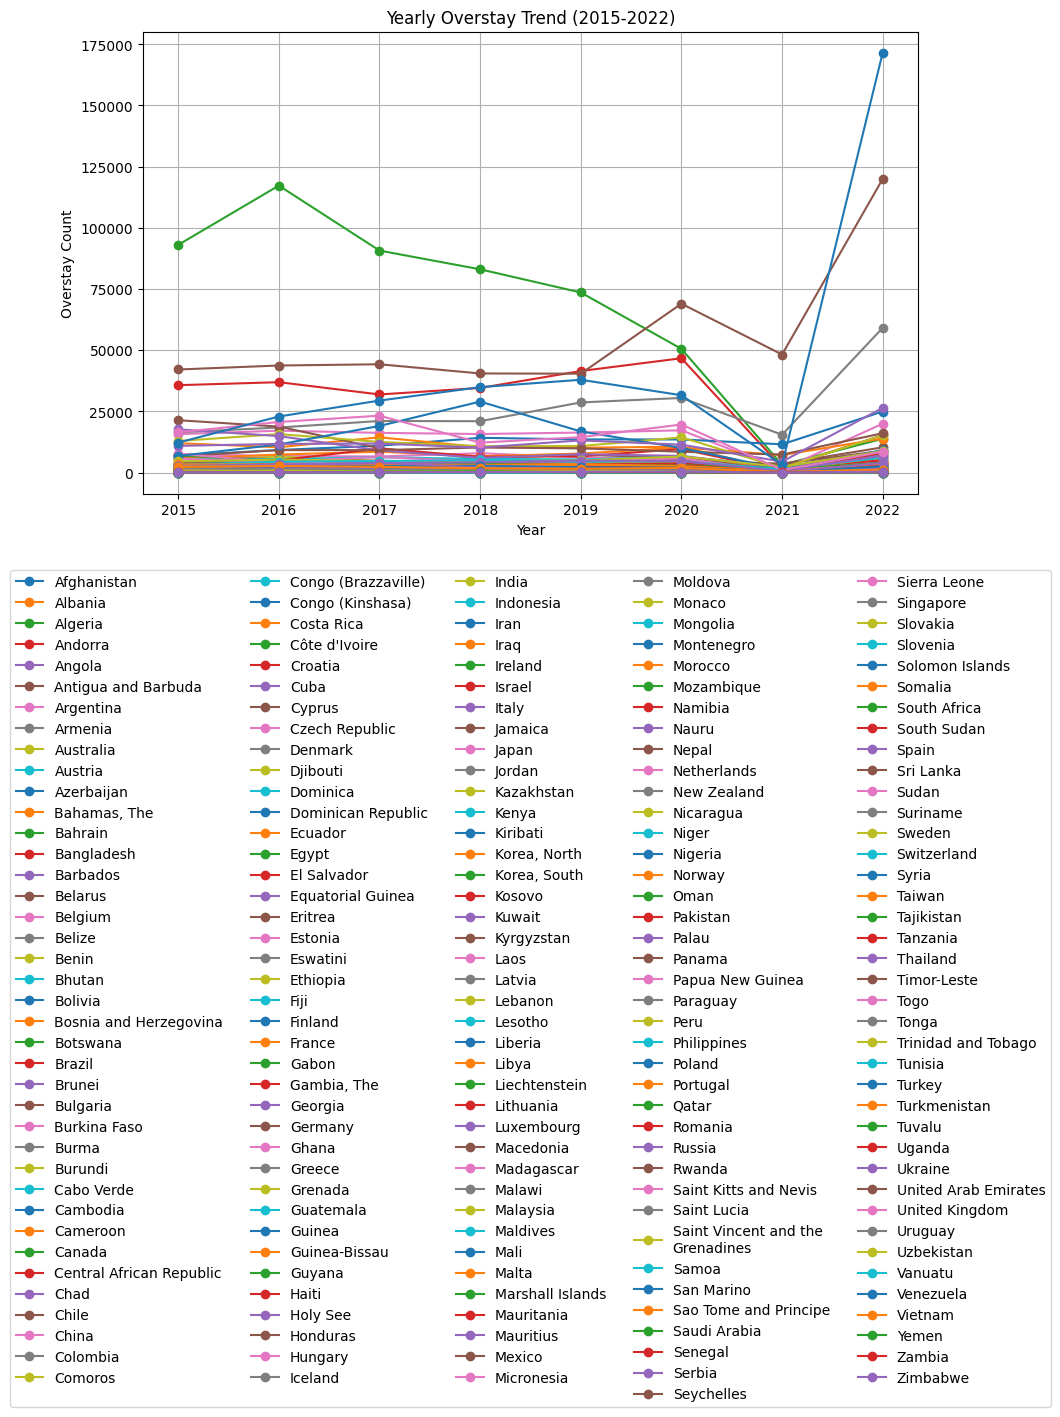

In [116]:
#Data visualization with line plot
df_transpose.plot(kind='line', figsize=(10,6), marker='o').legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.title('Yearly Overstay Trend (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Overstay Count')
plt.grid(True)
plt.show()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    195 non-null    int64
 1   2016    195 non-null    int64
 2   2017    195 non-null    int64
 3   2018    195 non-null    int64
 4   2019    195 non-null    int64
 5   2020    195 non-null    int64
 6   2021    195 non-null    int64
 7   2022    195 non-null    int64
dtypes: int64(8)
memory usage: 17.8+ KB


In [118]:
#looking for countries that have the highest trends
df.reset_index(inplace=True)
df['AVG_TREND'] = df[['2015','2016','2017','2018','2019','2020','2021','2022']].mean(axis=1)
df_best10 = df[['COUNTRY', 'AVG_TREND']].sort_values(by='AVG_TREND', ascending=False).head(10)
df_best10

,COUNTRY,AVG_TREND
32,Canada,65646.750
115,Mexico,56028.125
190,Venezuela,42967.500
23,Brazil,30578.750
37,Colombia,26329.375
36,China,14957.125
186,United Kingdom,14529.125
50,Dominican Republic,13114.125
130,Nigeria,12941.250
164,Spain,12515.000


<Figure size 2000x1000 with 0 Axes>

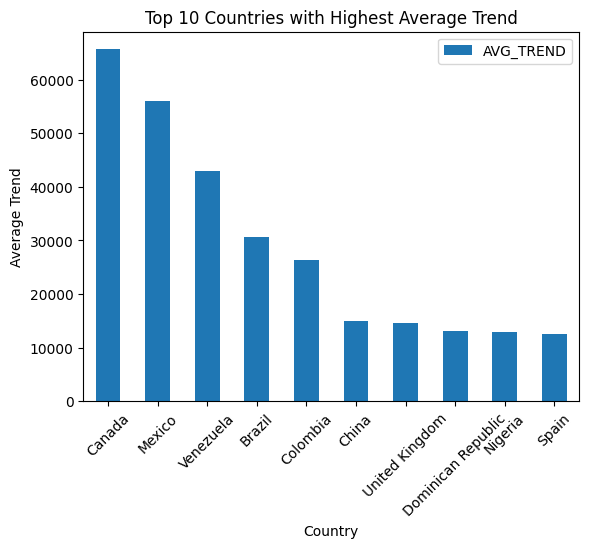

In [119]:
#Visualization
df_best10.set_index('COUNTRY', inplace=True)
plt.figure(figsize=(20,10))
df_best10.plot(kind= 'bar')
plt.title('Top 10 Countries with Highest Average Trend')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Average Trend')
plt.show()

## the highest vs the lowest overstay rates by country

In [120]:
high_low = df.loc[df['AVG_TREND'].isin([df['AVG_TREND'].max(), df['AVG_TREND'].min()]), ['COUNTRY', 'AVG_TREND']]
high_low

,COUNTRY,AVG_TREND
32,Canada,65646.750
91,"Korea, North",0.125


## pandemic overstay changes

In [121]:
df_transpose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2015 to 2022
Columns: 195 entries, Afghanistan to Zimbabwe
dtypes: int64(195)
memory usage: 12.5+ KB


In [122]:
df_transpose['AVG_yearly'] = df_transpose.iloc[:, 1:200].mean(axis=1)
df_yearly_avg = df_transpose[['AVG_yearly']]
df_yearly_avg

COUNTRY,AVG_yearly
2015,2487.432990
2016,2850.484536
2017,2727.664948
2018,2510.036082
2019,2563.273196
2020,2666.948454
2021,762.783505
2022,3641.597938


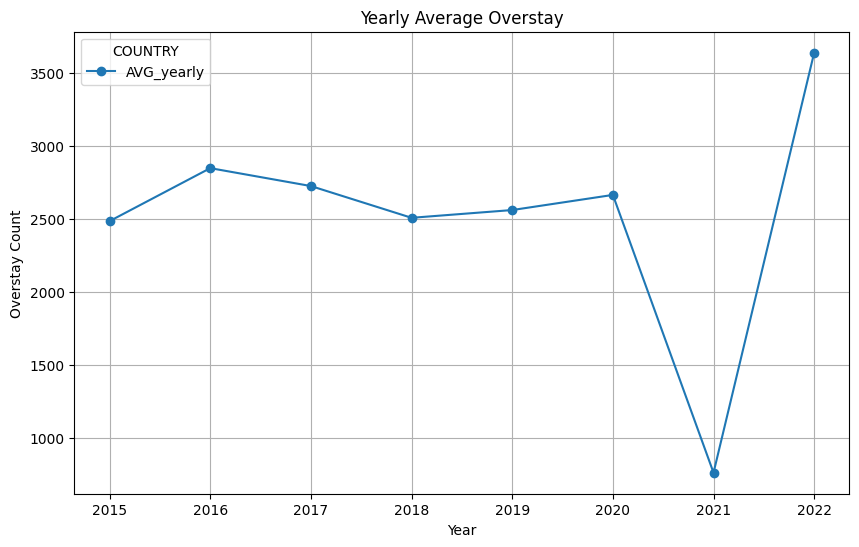

In [123]:
#Visualization
df_yearly_avg.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Yearly Average Overstay')
plt.xlabel('Year')
plt.ylabel('Overstay Count')
plt.grid(True)
plt.show()

## predict of future overstay

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRY    195 non-null    object 
 1   2015       195 non-null    int64  
 2   2016       195 non-null    int64  
 3   2017       195 non-null    int64  
 4   2018       195 non-null    int64  
 5   2019       195 non-null    int64  
 6   2020       195 non-null    int64  
 7   2021       195 non-null    int64  
 8   2022       195 non-null    int64  
 9   AVG_TREND  195 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 15.4+ KB


In [126]:
# Ambil data untuk negara tertentu, misalnya 'USA'
country_data = df[df['COUNTRY'] == 'Canada'].iloc[:, 1:-1].T  # Ambil kolom tahun
country_data.columns = ['OVERSTAY']
country_data.index = pd.date_range(start='2015', periods=len(country_data), freq='Y')

In [128]:
from statsmodels.tsa.arima.model import ARIMA
# Memisahkan data pelatihan dan pengujian
train = country_data['OVERSTAY'][:-2]  # Menggunakan data 2015-2020
test = country_data['OVERSTAY'][-2:]    # Menggunakan data 2021-2022

# Membuat dan melatih model ARIMA
model = ARIMA(train, order=(1, 1, 1))  # Ganti order jika perlu
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               OVERSTAY   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20013.576
Date:                Sun, 22 Sep 2024   AIC                          40033.152
Time:                        13:37:21   BIC                          40031.981
Sample:                    12-31-2015   HQIC                         40030.008
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      5.626     -0.178      0.859     -12.026      10.026
ma.L1          0.9999      5.642      0.177      0.859     -10.058      12.058
sigma2      4.933e+04    815.796     60.475      0.0

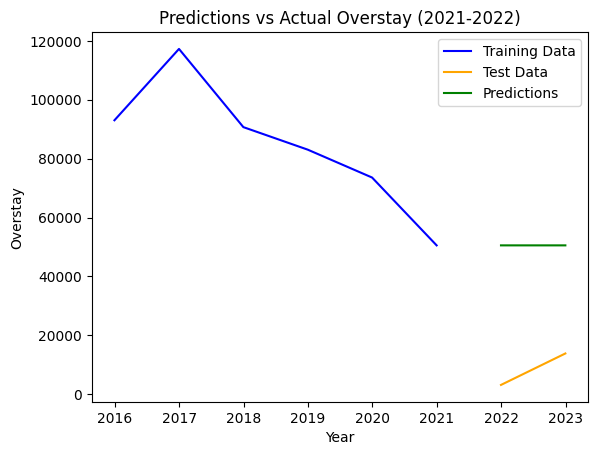

In [129]:
# Melakukan prediksi
predictions = model_fit.forecast(steps=len(test))

# Visualisasi hasil
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.title('Predictions vs Actual Overstay (2021-2022)')
plt.xlabel('Year')
plt.ylabel('Overstay')
plt.legend()
plt.show()


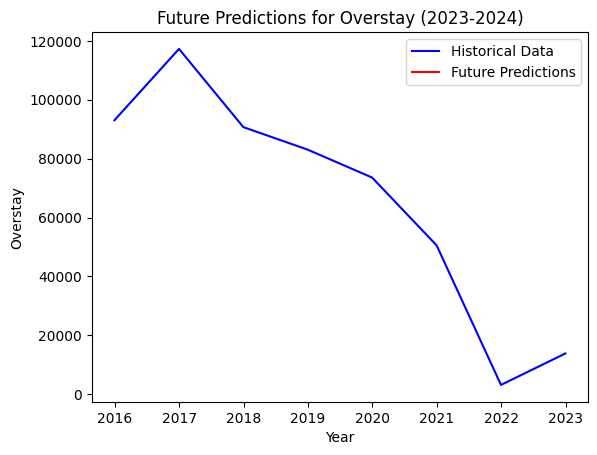

In [130]:
# Prediksi untuk tahun 2023 dan 2024
future_steps = 2
future_predictions = model_fit.forecast(steps=future_steps)

# Buat index untuk tahun mendatang
future_index = pd.date_range(start='2023', periods=future_steps, freq='Y')
future_series = pd.Series(future_predictions, index=future_index)

# Visualisasi hasil
plt.plot(country_data.index, country_data['OVERSTAY'], label='Historical Data', color='blue')
plt.plot(future_series.index, future_series, label='Future Predictions', color='red')
plt.title('Future Predictions for Overstay (2023-2024)')
plt.xlabel('Year')
plt.ylabel('Overstay')
plt.legend()
plt.show()


In [131]:
# Hitung rata-rata overstay per negara
df['AVG_TREND'] = df.iloc[:, 1:9].mean(axis=1)  # Rata-rata dari tahun 2015-2022

# Mengurutkan negara berdasarkan nilai rata-rata tertinggi
top_countries = df.sort_values(by='AVG_TREND', ascending=False)

# Tampilkan negara dengan nilai tertinggi
print(top_countries[['COUNTRY', 'AVG_TREND']].head(10))

                COUNTRY  AVG_TREND
32               Canada  65646.750
115              Mexico  56028.125
190           Venezuela  42967.500
23               Brazil  30578.750
37             Colombia  26329.375
36                China  14957.125
186      United Kingdom  14529.125
50   Dominican Republic  13114.125
130             Nigeria  12941.250
164               Spain  12515.000


In [136]:
# Misalkan df adalah DataFrame yang sudah ada
results = []

for country in df['COUNTRY'].unique():
    # Ambil data untuk negara tertentu
    country_data = df[df['COUNTRY'] == country].iloc[:, 1:9].T  # Ambil kolom tahun (2015-2022)
    country_data.columns = ['OVERSTAY']
    country_data.index = pd.date_range(start='2015', periods=len(country_data), freq='Y')

    # Melatih model ARIMA
    model = ARIMA(country_data['OVERSTAY'], order=(1, 1, 1))  # Sesuaikan order jika perlu
    model_fit = model.fit()

    # Melakukan prediksi untuk tahun 2023 dan 2024
    future_predictions = model_fit.forecast(steps=2)

    # Pastikan prediksi tidak kurang dari 0
    future_predictions = [max(0, pred) for pred in future_predictions]

    # Simpan hasil prediksi bersama negara
    results.append({'COUNTRY': country, '2023_PREDICTION': future_predictions[0], '2024_PREDICTION': future_predictions[1]})

# Membuat DataFrame dari hasil
predictions_df = pd.DataFrame(results)


# Mengurutkan berdasarkan rata-rata overstay tertinggi
top_predictions = predictions_df.sort_values(by='2023_PREDICTION', ascending=False).head(10)

# Tampilkan hasil
print(top_predictions[['COUNTRY', '2023_PREDICTION', '2024_PREDICTION']])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10

                COUNTRY  2023_PREDICTION  2024_PREDICTION
115              Mexico     77372.223418    109830.356909
32               Canada     27585.880941     21713.568186
50   Dominican Republic     23226.992448     24289.441530
23               Brazil     20444.950988     22686.116610
85              Jamaica     17398.082963     16356.938247
36                China     12420.745858     13716.106244
51              Ecuador     11281.906671     12624.015178
78                India      9661.036508     10824.471527
186      United Kingdom      9654.105738      8666.665272
37             Colombia      9519.695016     59141.144321
